# Water Quality Analysis

<img src='water.jpg' width=1000>

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings  # warning leride göstermesin
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('water_analysis.csv')

In [5]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df=df.dropna() # bosveri olan sütunlardaki NaN degerlerini siliyoruz.

In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
df['Potability'].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

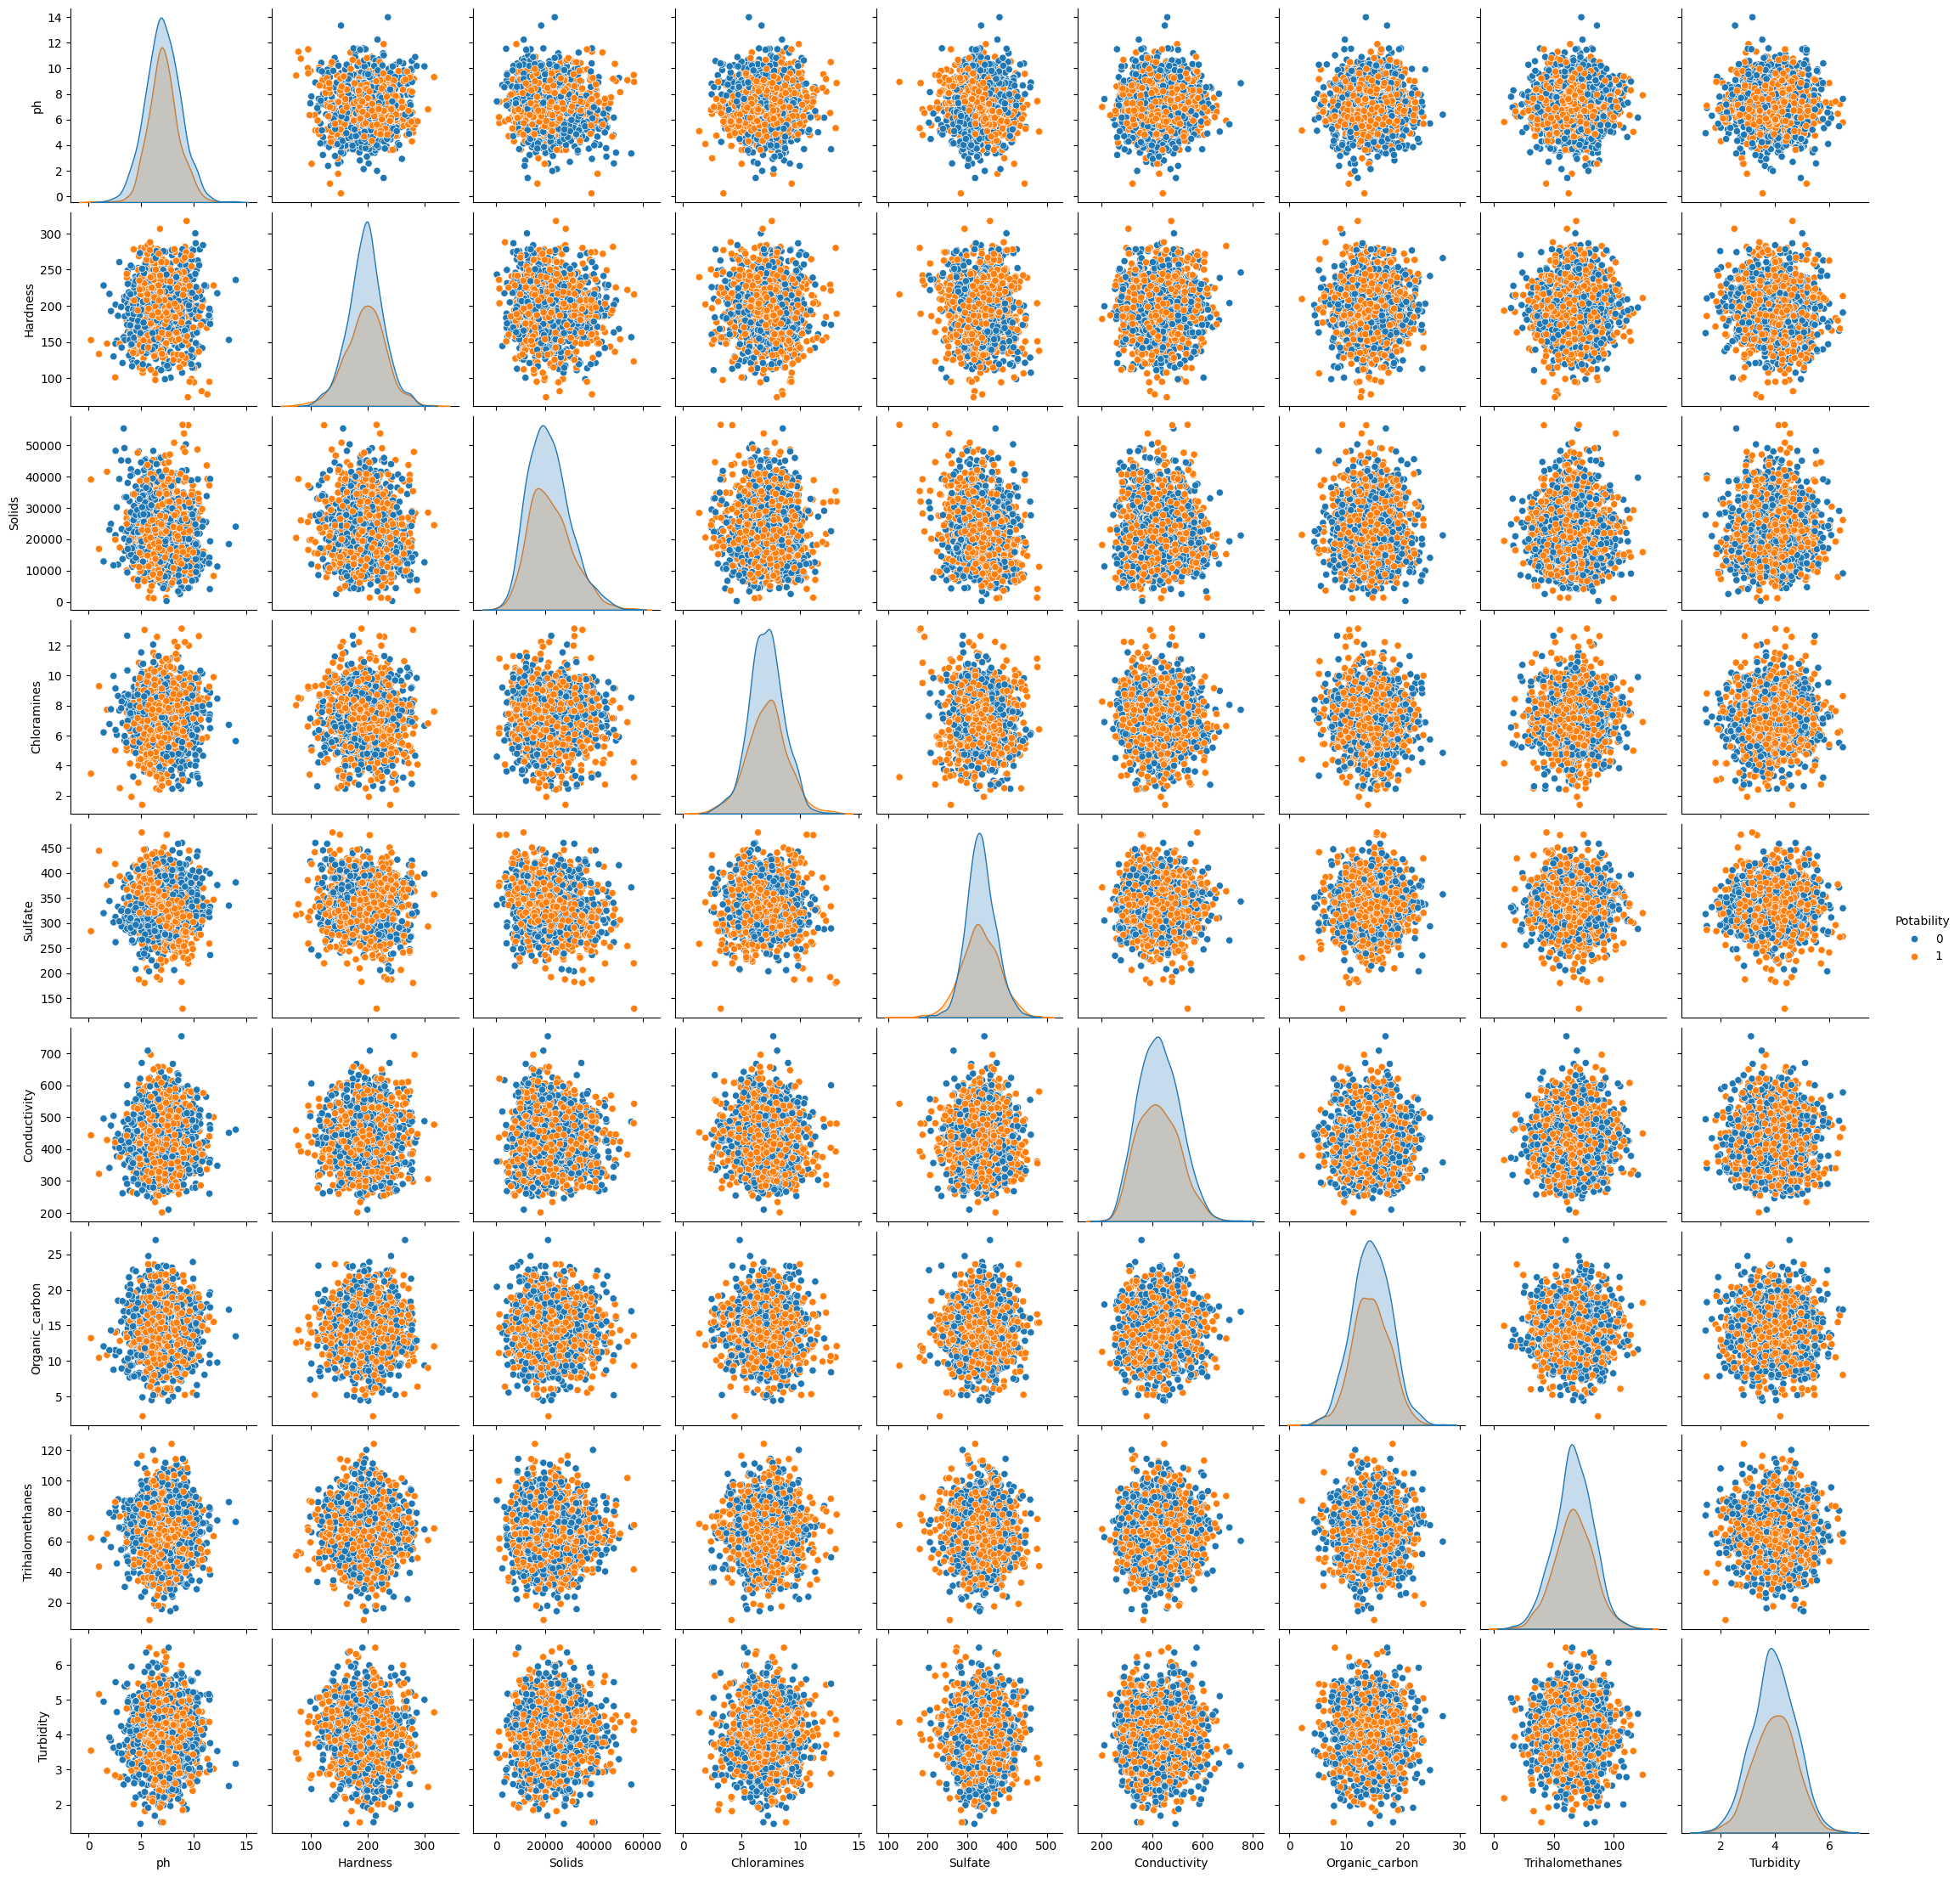

In [10]:
sns.pairplot(df, hue='Potability');

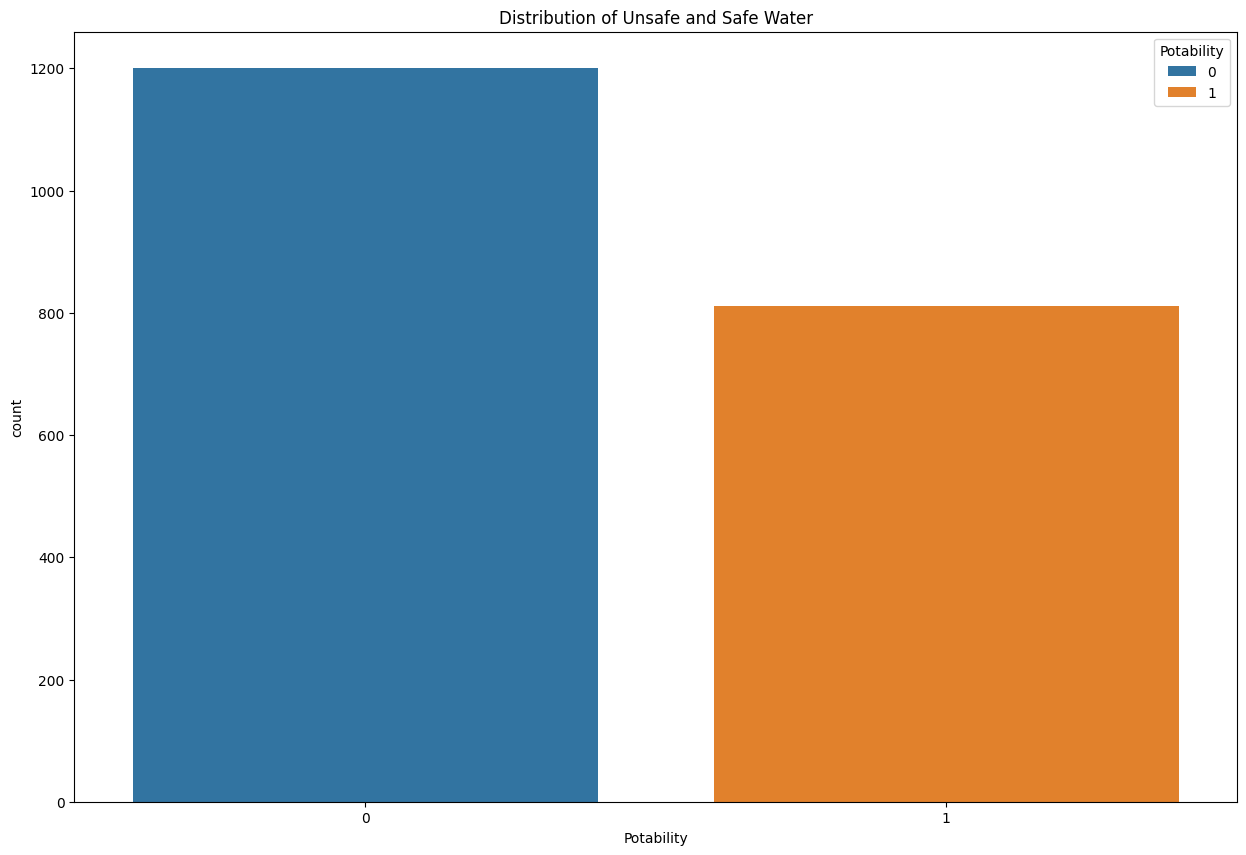

In [11]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df['Potability'], hue=df['Potability'])
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

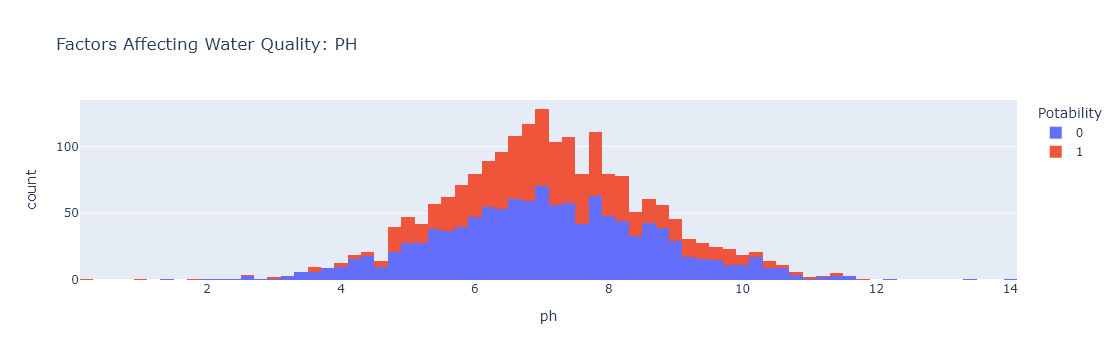

In [12]:
import plotly.express as px
df = df
figure = px.histogram(df, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

In [13]:
figure = px.histogram(df, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

In [14]:
figure = px.histogram(df, x = "Solids", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

In [15]:
figure = px.histogram(df, x = "Chloramines", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

In [16]:
figure = px.histogram(df, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

In [17]:
figure = px.histogram(df, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

In [18]:
figure = px.histogram(df, x = "Organic_carbon", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

In [19]:
figure = px.histogram(df, x = "Trihalomethanes", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

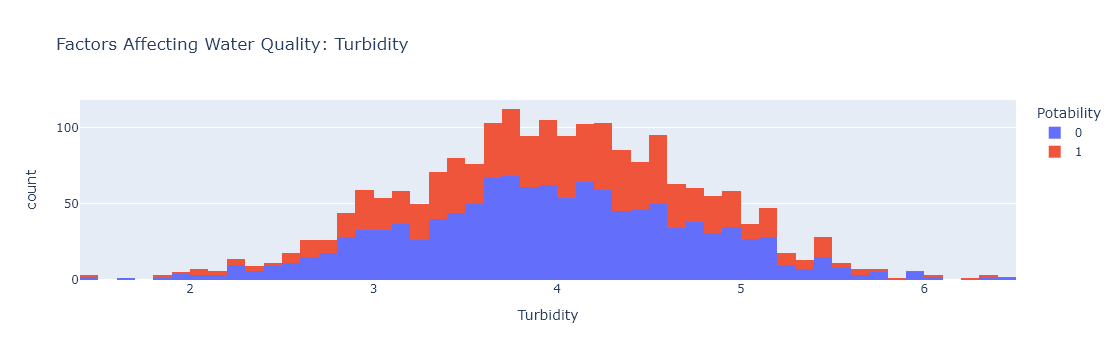

In [20]:
figure = px.histogram(df, x = "Turbidity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

## Python kullanarak Su Kalitesi Tahmin Modeli

In [22]:
#pip install pycaret

In [23]:
correlation = df.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

In [40]:
x=df.drop('Potability',axis=1) # hedef Attrition u sil, diger sütunlari x e esitle
y=df[['Potability']]

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [44]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[231   0]
 [172   0]]
LogisticRegression()  modeli eğitiliyor!..
[[231   0]
 [171   1]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[167  64]
 [ 79  93]]
RandomForestClassifier()  modeli eğitiliyor!..
[[201  30]
 [ 98  74]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[199  32]
 [111  61]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[161  70]
 [115  57]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[193  38]
 [125  47]]
MultinomialNB()  modeli eğitiliyor!..
[[148  83]
 [ 93  79]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[201  30]
 [ 98  74]]
classification Report:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       231
           1       0.71      0.43      0.54       172

    accuracy                           0.68       403
   macro avg       0.69      0.65      0.65       403
weighted avg       0.69      0.68  

Accuracy  Precision    Recall        F1
RandomForestClassifier      0.682382   0.682382  0.682382  0.682382
DecisionTreeClassifier      0.645161   0.645161  0.645161  0.645161
GradientBoostingClassifier  0.645161   0.645161  0.645161  0.645161
AdaBoostClassifier          0.595533   0.595533  0.595533  0.595533
LogisticRegression          0.575682   0.575682  0.575682  0.575682
BernoulliNB                 0.573201   0.573201  0.573201  0.573201
MultinomialNB               0.563275   0.563275  0.563275  0.563275
KNeighborsClassifier        0.540943   0.540943  0.540943  0.540943